In [1]:
from collections import Counter

import sys
import random
import numpy as np
import scipy
# import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


from scipy import io
from scipy import stats
import math
import pandas as pd

from scipy.integrate import ode

import time

In [61]:
# >>> from scipy.integrate import ode
# >>>
# >>> y0, t0 = [1.0j, 2.0], 0
# >>>
# >>> def f(t, y, arg1):
# >>>     return [1j*arg1*y[0] + y[1], -arg1*y[1]**2]
# >>> def jac(t, y, arg1):
# >>>     return [[1j*arg1, 1], [0, -arg1*2*y[1]]]

# >>>
# >>> r = ode(f, jac).set_integrator('zvode', method='bdf', with_jacobian=True)
# >>> r.set_initial_value(y0, t0).set_f_params(2.0).set_jac_params(2.0)
# >>> t1 = 10
# >>> dt = 1
# >>> while r.successful() and r.t < t1:
# >>>     r.integrate(r.t+dt)
# >>>     print("%g %g" % (r.t, r.y))



def f1(t, x, arg1):
    xdot = [0, 0, 0, 0]
    xdot[0] = x[1]
    xdot[1] = -0.04*x[0] - (3/t)*x[1]
    xdot[2] = x[3]
    xdot[3] = -0.01*x[2] - (3/t)*x[3]
    # return xdot
    return np.squeeze(xdot) 

def jac1(t, x, arg1):
    return [[0, 1, 0, 0], [-0.01, -3/t, 0, 0], [0, 0, 0, 1], [0, 0, -0.01, -3/t]]
    

def nesterov_grad_desc(func_name, init_state, n_iters, step_size):
    # NOT DEBUGGED YET
    
    X = np.zeros(([2, n_iters]))
    X[:,0] = init_state
    if func_name == 'figure_1':
        # Function: f = 0.02*x_1^2 + 0.005*x_2^2, starting from x_0 = (1, 1)
        # Gradient(f) = (0.04*x_1, 0.01*x_2)
        
        temp = init_state
        
        for k in range(n_iters-1):
            X[:, k+1] = temp - step_size*np.array([0.04*temp[0], 0.01*temp[1]])
            temp = X[:, k+1] + ((k)/(k+3))*(X[:,k+1] - X[:,k])
            
        return X
    else:
        return 0
        

def grad_desc(func_name, init_state, n_iters, step_size):
    # NOT DEBUGGED YET
    
    X = np.zeros(([2, n_iters]))
    X[:,0] = init_state
    if func_name == 'figure_1':
        # Function: f = 0.02*x_1^2 + 0.005*x_2^2, starting from x_0 = (1, 1)
        # Gradient(f) = (0.04*x_1, 0.01*x_2)
        
        for k in range(n_iters-1):
            X[:, k+1] = X[:, k] - step_size*np.array([0.04*X[0, k], 0.01*X[1, k]])
        
        return X
    else:
        return 0






# Figure 1 - 100 iterations

In [92]:
func_name = 'figure_1'
init_state = np.array([1, 1])
n_iters = 100
step_size = 0.25

X_nest = nesterov_grad_desc(func_name, init_state, n_iters, step_size)
X_normal = grad_desc(func_name, init_state, n_iters, step_size)

In [93]:
y0, t0 = [1, 0, 1, 0], 0.1

ODE_fl_data = []

r = ode(f1, jac1).set_integrator('zvode', method='bdf', with_jacobian=True)
r.set_initial_value(y0, t0).set_f_params(2.0).set_jac_params(2.0)
t1 = n_iters*np.sqrt(step_size)
dt = 0.1

while r.successful() and r.t < t1:
    r.integrate(r.t+dt)    
    ODE_fl_data.append(r.y)
    

ODE_fl_data = np.array(ODE_fl_data)
ODE_fl_data = ODE_fl_data[:, [0, 2]]

ODE_fl_data = np.real(ODE_fl_data).T

# print(ODE_fl_data)
# print()
# print(ODE_fl_data.shape)
# print()

# print(ODE_fl_data)
# print(type(X_normal[0, :]))


In [94]:
# ODE_fl_data

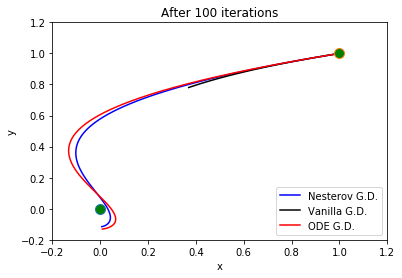

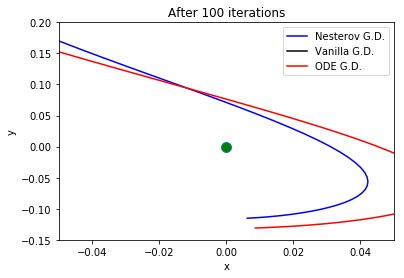

In [96]:
x_list = [[-0.2, 1.2], [-0.05, 0.05]]
y_list = [[-0.2, 1.2], [-0.15, 0.2]]

leg_loc = ['lower right', 'upper right']


for k in range(len(x_list)):
    plt.plot(X_nest[0, :], X_nest[1, :], color='blue', label = 'Nesterov G.D.')
    plt.plot(X_normal[0, :], X_normal[1, :], color='black', label = 'Vanilla G.D.')
    plt.plot(ODE_fl_data[0, :], ODE_fl_data[1, :], color='red', label = 'ODE G.D.')
    
    plt.plot(0, 0, marker = 'o', markerfacecolor='green', markersize = 10, fillstyle = 'full')
    plt.plot(1, 1, marker = 'o', markerfacecolor='green', markersize = 10, fillstyle = 'full')
    plt.title('After 100 iterations')
    plt.legend(loc= leg_loc[k], shadow=False, fontsize='x-large', prop={'size': 10})
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.xlim(x_list[k])
    plt.ylim(y_list[k])
    
    plt.show()


# Figure 1 - 900 Iterations

In [85]:
func_name = 'figure_1'
init_state = np.array([1, 1])
n_iters = 900
step_size = 0.25

X_nest = nesterov_grad_desc(func_name, init_state, n_iters, step_size)
X_normal = grad_desc(func_name, init_state, n_iters, step_size)

In [86]:
y0, t0 = [1, 0, 1, 0], 0.1

ODE_fl_data = []

r = ode(f1, jac1).set_integrator('zvode', method='bdf', with_jacobian=True)
r.set_initial_value(y0, t0).set_f_params(2.0).set_jac_params(2.0)
t1 = n_iters*np.sqrt(step_size)
dt = 0.1

while r.successful() and r.t < t1:
    r.integrate(r.t+dt)    
    ODE_fl_data.append(r.y)
    

ODE_fl_data = np.array(ODE_fl_data)
ODE_fl_data = ODE_fl_data[:, [0, 2]]

ODE_fl_data = np.real(ODE_fl_data).T

# print(ODE_fl_data)
# print()
# print(ODE_fl_data.shape)
# print()

print(ODE_fl_data)
# print(type(X_normal[0, :]))



[[0.9998875  0.99964448 0.99929703 ... 0.00175237 0.00176449 0.00177589]
 [0.99997188 0.99991111 0.99982423 ... 0.00115782 0.00120897 0.00125997]]


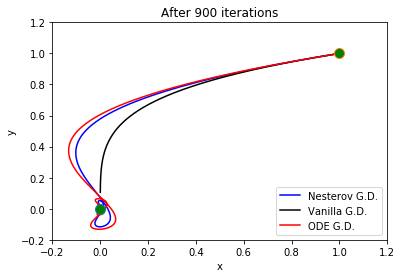

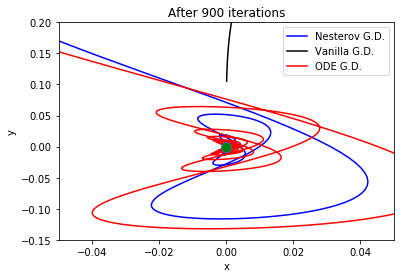

In [87]:
x_list = [[-0.2, 1.2], [-0.05, 0.05]]
y_list = [[-0.2, 1.2], [-0.15, 0.2]]

leg_loc = ['lower right', 'upper right']


for k in range(len(x_list)):
    plt.plot(X_nest[0, :], X_nest[1, :], color='blue', label = 'Nesterov G.D.')
    plt.plot(X_normal[0, :], X_normal[1, :], color='black', label = 'Vanilla G.D.')
    plt.plot(ODE_fl_data[0, :], ODE_fl_data[1, :], color='red', label = 'ODE G.D.')
    
    plt.plot(0, 0, marker = 'o', markerfacecolor='green', markersize = 10, fillstyle = 'full')
    plt.plot(1, 1, marker = 'o', markerfacecolor='green', markersize = 10, fillstyle = 'full')
    plt.title('After 900 iterations')
    plt.legend(loc= leg_loc[k], shadow=False, fontsize='x-large', prop={'size': 10})
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.xlim(x_list[k])
    plt.ylim(y_list[k])
    plt.show()

# Figure 1 - 2500

In [88]:
func_name = 'figure_1'
init_state = np.array([1, 1])
n_iters = 2500
step_size = 0.25

X_nest = nesterov_grad_desc(func_name, init_state, n_iters, step_size)
X_normal = grad_desc(func_name, init_state, n_iters, step_size)

In [89]:
y0, t0 = [1, 0, 1, 0], 0.1

ODE_fl_data = []

r = ode(f1, jac1).set_integrator('zvode', method='bdf', with_jacobian=True)
r.set_initial_value(y0, t0).set_f_params(2.0).set_jac_params(2.0)
t1 = n_iters*np.sqrt(step_size)
dt = 0.1

while r.successful() and r.t < t1:
    r.integrate(r.t+dt)    
    ODE_fl_data.append(r.y)
    

ODE_fl_data = np.array(ODE_fl_data)
ODE_fl_data = ODE_fl_data[:, [0, 2]]

ODE_fl_data = np.real(ODE_fl_data).T

# print(ODE_fl_data)
# print()
# print(ODE_fl_data.shape)
# print()

print(ODE_fl_data)
# print(type(X_normal[0, :]))




[[ 9.99887503e-01  9.99644481e-01  9.99297025e-01 ... -3.41872528e-04
  -3.46052182e-04 -3.50092434e-04]
 [ 9.99971875e-01  9.99911113e-01  9.99824228e-01 ... -1.13450709e-03
  -1.13300753e-03 -1.13139505e-03]]


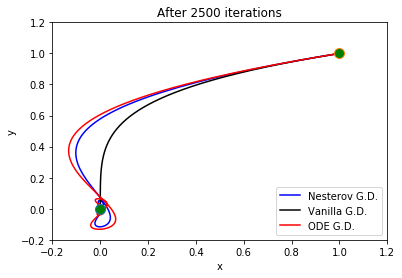

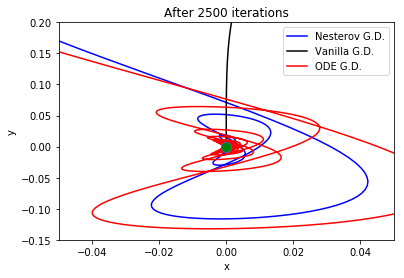

In [90]:
x_list = [[-0.2, 1.2], [-0.05, 0.05]]
y_list = [[-0.2, 1.2], [-0.15, 0.2]]

leg_loc = ['lower right', 'upper right']


for k in range(len(x_list)):
    plt.plot(X_nest[0, :], X_nest[1, :], color='blue', label = 'Nesterov G.D.')
    plt.plot(X_normal[0, :], X_normal[1, :], color='black', label = 'Vanilla G.D.')
    plt.plot(ODE_fl_data[0, :], ODE_fl_data[1, :], color='red', label = 'ODE G.D.')
    
    plt.plot(0, 0, marker = 'o', markerfacecolor='green', markersize = 10, fillstyle = 'full')
    plt.plot(1, 1, marker = 'o', markerfacecolor='green', markersize = 10, fillstyle = 'full')
    plt.title('After 2500 iterations')
    plt.legend(loc= leg_loc[k], shadow=False, fontsize='x-large', prop={'size': 10})
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.xlim(x_list[k])
    plt.ylim(y_list[k])
    plt.show()

[[-0.00187489+0.j  0.00112499+0.j]
 [-0.00296233+0.j  0.00303687+0.j]
 [-0.00398262+0.j  0.00501502+0.j]
 ...
 [ 0.00324279+0.j  0.2977147 +0.j]
 [ 0.00320703+0.j  0.2976985 +0.j]
 [ 0.00317009+0.j  0.2976821 +0.j]]
(1000, 2)


In [73]:
# A = np.array([[2, 3, 4, 7], [9, 6, 8, 2]])
# A[:, [1, 3]]

# Figure 2

# ODE Template

In [23]:
from scipy.integrate import ode

y0, t0 = [1.0j, 2.0], 0

def f(t, y, arg1):
     return [1j*arg1*y[0] + y[1], -arg1*y[1]**2]
def jac(t, y, arg1):
     return [[1j*arg1, 1], [0, -arg1*2*y[1]]]

In [24]:
r = ode(f, jac).set_integrator('zvode', method='bdf', with_jacobian=False)
r.set_initial_value(y0, t0).set_f_params(2.0).set_jac_params(2.0)
t1 = 100
dt = 0.1
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    print("{0}, {1}".format(round(r.t, 4), r.y))





0.1, [-0.03164918+0.99777002j  1.42858183+0.j        ]
0.2, [-0.10447573+0.98463981j  1.11111429+0.j        ]
0.3, [-0.19837677+0.95458991j  0.90909354+0.j        ]
0.4, [-0.30112224+0.90470626j  0.76923214+0.j        ]
0.5, [-0.40380019+0.83414944j  0.66666974+0.j        ]
0.6, [-0.4993188 +0.74366636j  0.58823739+0.j        ]
0.7, [-0.58187679+0.63528844j  0.52631725+0.j        ]
0.8, [-0.6467898 +0.51209438j  0.47619164+0.j        ]
0.9, [-0.69045808+0.37799127j  0.43478399+0.j        ]
1.0, [-0.71038232+0.23749653j  0.40000271+0.j        ]
1.1, [-0.70518528+0.09551556j  0.37037318+0.j        ]
1.2, [-0.67461661-0.04288366j  0.34483026+0.j        ]
1.3, [-0.61952898-0.17269407j  0.32258318+0.j        ]
1.4, [-0.54182129-0.28918497j  0.30303259+0.j        ]
1.5, [-0.44434676-0.38810273j  0.28571639+0.j        ]
1.6, [-0.33078748-0.46584957j  0.27027218+0.j        ]
1.7, [-0.20549903-0.51963433j  0.256412  +0.j        ]
1.8, [-0.07333035-0.54758945j  0.24390403+0.j        ]
1.9, [0.06

77.2, [-0.04713037-0.65653908j  0.00645578+0.j        ]
77.3, [0.08488417-0.65275083j 0.00644745+0.j        ]
77.4, [0.21351372-0.62281094j 0.00643915+0.j        ]
77.5, [0.33363025-0.5679132j 0.00643087+0.j       ]
77.6, [0.44044508-0.49024639j 0.00642261+0.j        ]
77.7, [0.52969986-0.39290703j 0.00641437+0.j        ]
77.8, [0.59783629-0.27977589j 0.00640615+0.j        ]
77.9, [0.642138  -0.15536335j 0.00639795+0.j        ]
78.0, [0.66083885-0.0246295j 0.00638978+0.j       ]
78.1, [0.6531933 +0.10721353j 0.00638162+0.j        ]
78.2, [0.61950617+0.23490942j 0.00637349+0.j        ]
78.3, [0.56112049+0.35336717j 0.00636537+0.j        ]
78.4, [0.48036394+0.45786409j 0.00635728+0.j        ]
78.5, [0.38045602+0.54423406j 0.00634921+0.j        ]
78.6, [0.26537978+0.60903363j 0.00634116+0.j        ]
78.7, [0.13972296+0.6496793j 0.00633312+0.j       ]
78.8, [0.0084951 +0.66455052j 0.00632511+0.j        ]
78.9, [-0.12307215+0.65305426j  0.00631712+0.j        ]
79.0, [-0.2497336 +0.61564871j

# Scratch Work

In [36]:
# x = np.empty((1, 3), int)
# x = np.vstack((x,[2, 3, 4]))
# x

x = []
x.append([2, 3, 4])
x.append([4, 3, 5])
x = np.array(x)
print(x)

[[2 3 4]
 [4 3 5]]
